# Librerías

In [9]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt

# Modelado y Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import  KNeighborsRegressor

from keras.models import Sequential
from keras.layers import Conv1D, Dense, Flatten

from statsmodels.tsa.statespace.sarimax import SARIMAX


# Calculo de metricas
# ==============================================================================
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Constantes

In [10]:
FILE_DATOS = './data/laguna_datos_horarios_rellenos.csv'

HOR_31 = 120
HOR_32 = 400
HOR_33 = 420

HORIZONTES_3 = [HOR_31, HOR_32, HOR_33]

PRIMER_CONJUNTO = 1110
SEGUNDO_CONJUNTO = 1500
TERCER_CONJUNTO = 2113

# Carga de datos

In [11]:
parametro = 'temperatura'
output=parametro
inputs = [
          'fecha', 'temperatura',
          'ambiente', 'nivel'
          ]
usecols = inputs.copy()

datos = pd.read_csv(FILE_DATOS,
                    sep=',', 
                    usecols = usecols)

# Preparación del dato
# ==============================================================================
datos['fecha'] = pd.to_datetime(datos['fecha'], format='%d/%m/%Y %H:%M')
datos = datos.set_index('fecha')
datos = datos.rename(columns={'x': 'y'})
datos = datos.asfreq('H')
datos = datos.sort_index()

datos.info()

datos.head()

FileNotFoundError: [Errno 2] No such file or directory: './data/laguna_datos_horarios_rellenos.csv'

# Modelos

In [ ]:
def separar_train_test(datos, conjunto, horizonte):
    data = datos[:conjunto].copy()
    steps = horizonte
    
    datos_train = data[:-steps]
    datos_test  = data[-steps:]

    print(f'Fechas train : {datos_train.index.min()} --- {datos_train.index.max()}  (n={len(datos_train)})')
    print(f'Fechas test  : {datos_test.index.min()} --- {datos_test.index.max()}  (n={len(datos_test)})')

    fig, ax = plt.subplots(figsize=(20, 8))
    datos_train['temperatura'].plot(ax=ax, label='entrenamiento')
    datos_test['temperatura'].plot(ax=ax, label='test')
    ax.set_title(f'Conjunto de entrenamiento y test - Dataset {conjunto} ({horizonte} horas)')
    ax.legend()
    plt.show()

    return datos_train, datos_test
    

In [ ]:
def obtener_metricas(test, predictions):
    r2 = r2_score(test, predictions)
    mse = mean_squared_error(test, predictions)
    mae = mean_absolute_error(test, predictions)

    return r2, mse, mae

In [ ]:
def pintar_grafica(titulo,data, label_datos, colores, label_x, label_y, alto, ancho):
    fig, ax = plt.subplots(figsize=(ancho, alto))

    ax.minorticks_on()

    # Graficar la serie de datos con pandas en el eje configurado
    for id in range(0,len(data)):
        data[id].plot(ax=ax, label=label_datos[id], color=colores[id],lw = 2)

    # Aplicar configuraciones al eje
    ax.set_facecolor('white')
    ax.grid(True, color='lightgrey', linestyle='--', linewidth=0.5)

    # Ajustes finales de estilo si son necesarios
    # ax.tick_params(labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=17)
    ax.tick_params(axis='x', which='minor', labelsize=16)

    ax.tick_params(axis='y', labelsize=17)

    ax.legend(fontsize=20)

    ax.set_xlabel(label_x, fontsize=20)
    ax.set_ylabel(label_y, fontsize=20)
    ax.set_title(titulo, fontsize=25)

    # Mostrar la gráfica
    plt.show()

In [ ]:
def pintar_resultados(df_ret, test, horizonte, modelo):

    fig, ax = plt.subplots(figsize=(15, 5))
    plt.title(f'{modelo} ({horizonte} horas)', fontsize=30);
    #df_train['temperatura'].plot(ax=ax, label='train')

    df_ret['temperatura'].plot(ax=ax, label='Predicción')
    test.plot(ax=ax, label='Original')
    # datos['temperatura'].tail(25+steps).plot(ax=ax, label='Original')
    ax.legend()
    plt.show()

## - Modelos

### 1. LR

In [ ]:
def LR(X_train, y_train, X_test, y_test, horizonte):
    predicciones = pd.DataFrame()

    model_LR1 = LinearRegression()
    model_LR1.fit(X_train.values, y_train.values)
    y_pred = model_LR1.predict(X_test.values)

    predicciones = pd.DataFrame({"temperatura":y_pred})
    predicciones = predicciones.set_index(X_test.index)

    pintar_resultados(predicciones, y_test['temperatura'], horizonte, 'LR')
    
    r2, mse, mae = obtener_metricas(y_test['temperatura'].values, predicciones)
    resultados = pd.DataFrame({'model':['LR'],
                               'horizonte':[horizonte],
                               'r2':[r2], 
                               'mse':[mse], 
                               'mae':[mae]})
    return resultados, predicciones

### 2. RF

In [ ]:
def RF(X_train, y_train, X_test, y_test, horizonte):
    predicciones = pd.DataFrame()

    model_RF1 = RandomForestRegressor()
    model_RF1.fit(X_train.values, y_train.values)
    y_pred = model_RF1.predict(X_test.values)

    predicciones = pd.DataFrame({"temperatura":y_pred})
    predicciones = predicciones.set_index(X_test.index)

    pintar_resultados(predicciones, y_test['temperatura'], horizonte, 'RF')
    
    r2, mse, mae = obtener_metricas(y_test['temperatura'].values, predicciones)
    resultados = pd.DataFrame({'model':['RF'],
                               'horizonte':[horizonte],
                               'r2':[r2], 
                               'mse':[mse], 
                               'mae':[mae]})
    return resultados, predicciones

### 3. KNN

In [ ]:
def KNN(X_train, y_train, X_test, y_test, horizonte):
    predicciones = pd.DataFrame()

    model_KNN = KNeighborsRegressor(5, weights='distance')
    model_KNN.fit(X_train.values, y_train.values)
    y_pred = model_KNN.predict(X_test.values)

    predicciones=pd.DataFrame({"temperatura":y_pred})
    predicciones = predicciones.set_index(X_test.index)

    pintar_resultados(predicciones, y_test['temperatura'], horizonte, 'KNN')
    
    r2, mse, mae = obtener_metricas(y_test['temperatura'].values, predicciones)
    resultados = pd.DataFrame({'model':['KNN'],
                               'horizonte':[horizonte],
                               'r2':[r2], 
                               'mse':[mse], 
                               'mae':[mae]})
    return resultados, predicciones

### 4. MLP

In [ ]:
def MLP(X_train, y_train, X_test, y_test, horizonte):
    predicciones = pd.DataFrame()

    model_MLP = MLPRegressor(hidden_layer_sizes=(32,32), learning_rate_init=0.01, max_iter=400, random_state=1)
    model_MLP.fit(X_train.values, y_train.values)
    y_pred = model_MLP.predict(X_test.values)

    predicciones=pd.DataFrame({"temperatura":y_pred})
    predicciones = predicciones.set_index(X_test.index)

    pintar_resultados(predicciones, y_test['temperatura'], horizonte, 'MLP')
    
    r2, mse, mae = obtener_metricas(y_test['temperatura'].values, predicciones)
    resultados = pd.DataFrame({'model':['MLP'],
                               'horizonte':[horizonte],
                               'r2':[r2], 
                               'mse':[mse], 
                               'mae':[mae]})
    return resultados, predicciones

### 5. Lasso

In [ ]:
def Lasso_V(X_train, y_train, X_test, y_test, horizonte):
    predicciones = pd.DataFrame()

    model_Lasso = Lasso()
    model_Lasso.fit(X_train.values, y_train.values)
    y_pred = model_Lasso.predict(X_test.values)

    predicciones=pd.DataFrame({"temperatura":y_pred})
    predicciones = predicciones.set_index(X_test.index)

    pintar_resultados(predicciones, y_test['temperatura'], horizonte, 'Lasso')
    
    r2, mse, mae = obtener_metricas(y_test['temperatura'].values, predicciones)
    resultados = pd.DataFrame({'model':['Lasso'],
                               'horizonte':[horizonte],
                               'r2':[r2], 
                               'mse':[mse], 
                               'mae':[mae]})
    return resultados, predicciones

### 6. DT

In [ ]:
def DT(X_train, y_train, X_test, y_test, horizonte):
    predicciones = pd.DataFrame()

    model_DT = DecisionTreeRegressor()
    model_DT.fit(X_train.values, y_train.values)
    y_pred = model_DT.predict(X_test.values)

    predicciones=pd.DataFrame({"temperatura":y_pred})
    predicciones = predicciones.set_index(X_test.index)

    pintar_resultados(predicciones, y_test['temperatura'], horizonte, 'DT')
    
    r2, mse, mae = obtener_metricas(y_test['temperatura'].values, predicciones)
    resultados = pd.DataFrame({'model':['DT'],
                               'horizonte':[horizonte],
                               'r2':[r2], 
                               'mse':[mse], 
                               'mae':[mae]})
    return resultados, predicciones

### 7. SVR

In [ ]:
def SV(X_train, y_train, X_test, y_test, horizonte):
    predicciones = pd.DataFrame()


    model_SVR = SVR()
    model_SVR.fit(X_train.values, y_train.values)
    y_pred = model_SVR.predict(X_test.values)

    predicciones=pd.DataFrame({"temperatura":y_pred})
    predicciones = predicciones.set_index(X_test.index)
    
    pintar_resultados(predicciones, y_test['temperatura'], horizonte, 'SVR')
    
    r2, mse, mae = obtener_metricas(y_test['temperatura'].values, predicciones)
    resultados = pd.DataFrame({'model':['SVR'],
                               'horizonte':[horizonte],
                               'r2':[r2], 
                               'mse':[mse], 
                               'mae':[mae]})
    return resultados, predicciones

### 8. CNN

In [ ]:
def create_model(opt, loss="mse"):
    model = Sequential()
    # opt = tf.optimizers.Adam(learning_rate=0.1)
    # model.add(Dense(32, activation="relu"))
    model.add(Conv1D(64, 2, activation="relu", input_shape=(2, 1)))
    model.add(Flatten())
    model.add(Dense(32, activation="relu"))
    model.add(Dense(1))
    model.compile(loss=loss, optimizer=opt)
    # model.summary()
    return model

def CNN_V(X_train, y_train, X_test, y_test, horizonte, datos_test):
    predicciones = pd.DataFrame()

    opt = "adam"
    model_CNN = create_model(opt)
    model_CNN.fit(X_train, y_train, batch_size=24, epochs=100, verbose=1)
    y_pred = model_CNN.predict(X_test)

    predicciones=pd.DataFrame({"temperatura":y_pred.flatten()})
    predicciones = predicciones.set_index(datos_test.index)

    # pintar_resultados(predicciones, y_test['temperatura'], horizonte, 'CNN')
    
    r2, mse, mae = obtener_metricas(datos_test['temperatura'].values, predicciones)
    resultados = pd.DataFrame({'model':['CNN'],
                               'horizonte':[horizonte],
                               'r2':[r2], 
                               'mse':[mse], 
                               'mae':[mae]})
    
    titulo = f"2do Experimento - CNN ({horizonte} horas)"
    data = [datos_test['temperatura'],predicciones['temperatura']]
    labels = ["Originales", "Predichos"]
    colores = ["cornflowerblue", "limegreen"]#"seagreen","indigo","red","chocolate","orchid","darkgray",gold]
    alto = 3
    ancho = 15
    pintar_grafica(titulo,data, labels, colores, "Fecha","Temperatura (ºC)", alto, ancho)
    
    return resultados, predicciones

### 9. SARIMAX

In [16]:
def SARIMA_V(X_train, y_train, X_test, y_test, horizonte):
    # fit model
    model_SARIMAX = SARIMAX(y_train, exog=X_train, order=(3, 1, 0), seasonal_order=(1, 0, 1, 24))
    model__SARIMAX_fit = model_SARIMAX.fit(disp=False)
    # make prediction
    predicciones = model__SARIMAX_fit.predict(len(X_train), len(X_train) + len(X_test) -1, exog=X_test.values)
    
    res=pd.DataFrame({'temperatura':predicciones})
    # print(res)
    pintar_resultados(res, y_test['temperatura'], horizonte, 'SARIMA')
    
    r2, mse, mae = obtener_metricas(y_test['temperatura'].values, predicciones)
    resultados = pd.DataFrame({'model':['SARIMA'],
                               'horizonte':[horizonte],
                               'r2':[r2], 
                               'mse':[mse], 
                               'mae':[mae]})
    return resultados, predicciones

### MODELOS

In [17]:
def ejecutar_modelos(datos_train, datos_test, entreno, resultados):
  X_train = datos_train[["ambiente","nivel"]]
  y_train = datos_train["temperatura"]
  X_test = datos_test[["ambiente","nivel"]]
  y_test = datos_test[["temperatura"]]

  ######################################################

  X_train_CNN = datos_train[["ambiente","nivel"]].to_numpy()
  y_train_CNN = datos_train["temperatura"].to_numpy()
  X_test_CNN = datos_test[["ambiente","nivel"]].to_numpy()
  y_test_CNN = datos_test["temperatura"].to_numpy()

  X_train_CNN = X_train_CNN.reshape(X_train_CNN.shape[0], X_train_CNN.shape[1], 1)
  X_test_CNN = X_test_CNN.reshape(X_test_CNN.shape[0], X_test_CNN.shape[1], 1)

  ##########################################################################################################

  
  res, predicciones_LR = LR(X_train, y_train, X_test, y_test, entreno)
  resultados = pd.concat([resultados, res], axis=0)

  res, predicciones_RF = RF(X_train, y_train, X_test, y_test, entreno)
  resultados = pd.concat([resultados, res], axis=0)

  res, predicciones_KNN = KNN(X_train, y_train, X_test, y_test, entreno)
  resultados = pd.concat([resultados, res], axis=0)

  res, predicciones_MLP = MLP(X_train, y_train, X_test, y_test, entreno)
  resultados = pd.concat([resultados, res], axis=0)

  res, predicciones_Lasso = Lasso_V(X_train, y_train, X_test, y_test, entreno)
  resultados = pd.concat([resultados, res], axis=0)

  res, predicciones_DT = DT(X_train, y_train, X_test, y_test, entreno)
  resultados = pd.concat([resultados, res], axis=0)

  res, predicciones_SVR = SV(X_train, y_train, X_test, y_test, entreno)
  resultados = pd.concat([resultados, res], axis=0)

  res, predicciones_CNN = CNN_V(X_train_CNN, y_train_CNN, X_test_CNN, y_test_CNN, entreno, datos_test)
  resultados = pd.concat([resultados, res], axis=0)

  res, predicciones_SARIMAX = SARIMA_V(X_train, y_train, X_test, y_test, entreno)
  resultados = pd.concat([resultados, res], axis=0)
  
  predicciones_todas = [predicciones_LR, predicciones_RF, predicciones_KNN, 
                  predicciones_MLP, predicciones_Lasso, predicciones_DT,
                  predicciones_SVR, predicciones_CNN, predicciones_SARIMAX]

  # predicciones_todas = [predicciones_SVR, predicciones_SARIMAX]

  return resultados, predicciones_todas

# Resultados

Fechas train : 2023-06-17 00:00:00 --- 2023-09-08 00:00:00  (n=1993)
Fechas test  : 2023-09-08 01:00:00 --- 2023-09-13 00:00:00  (n=120)


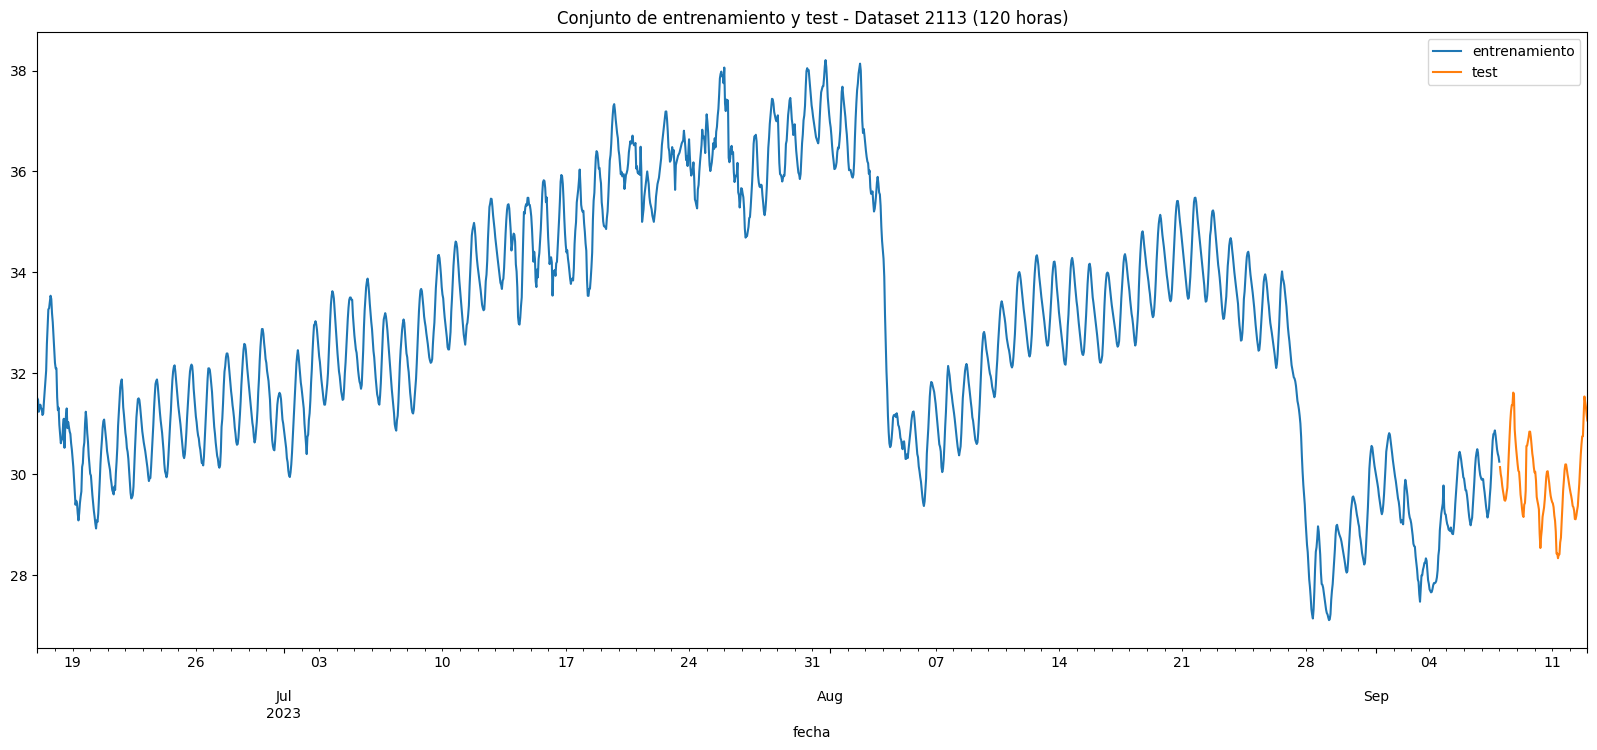

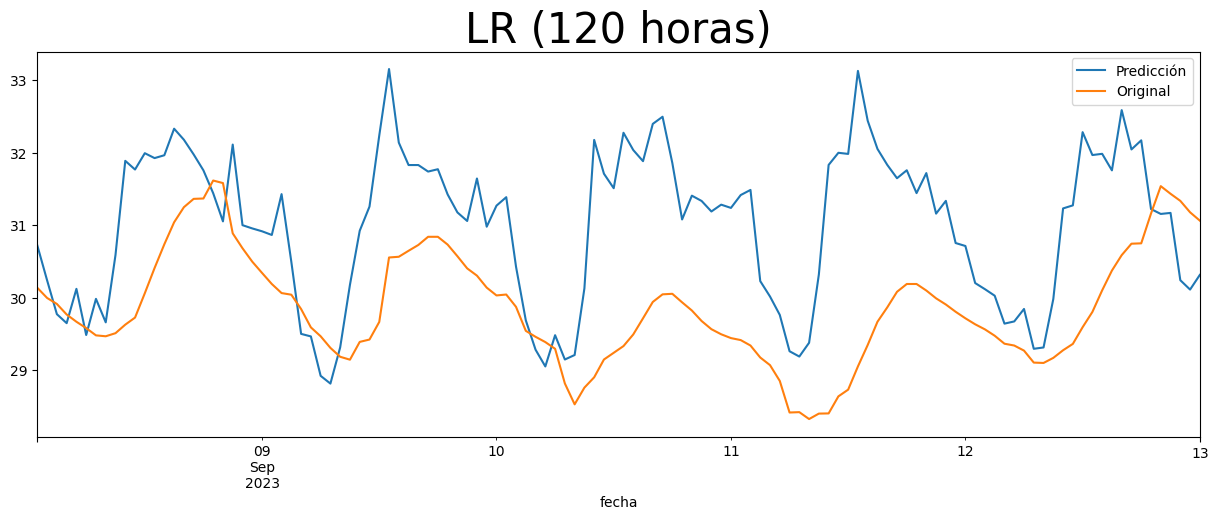

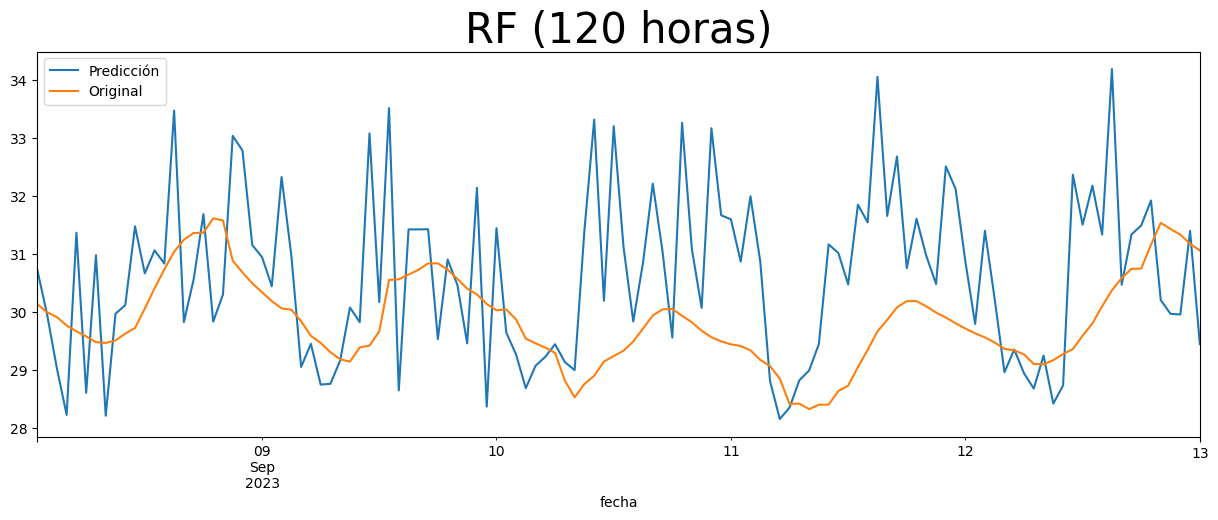

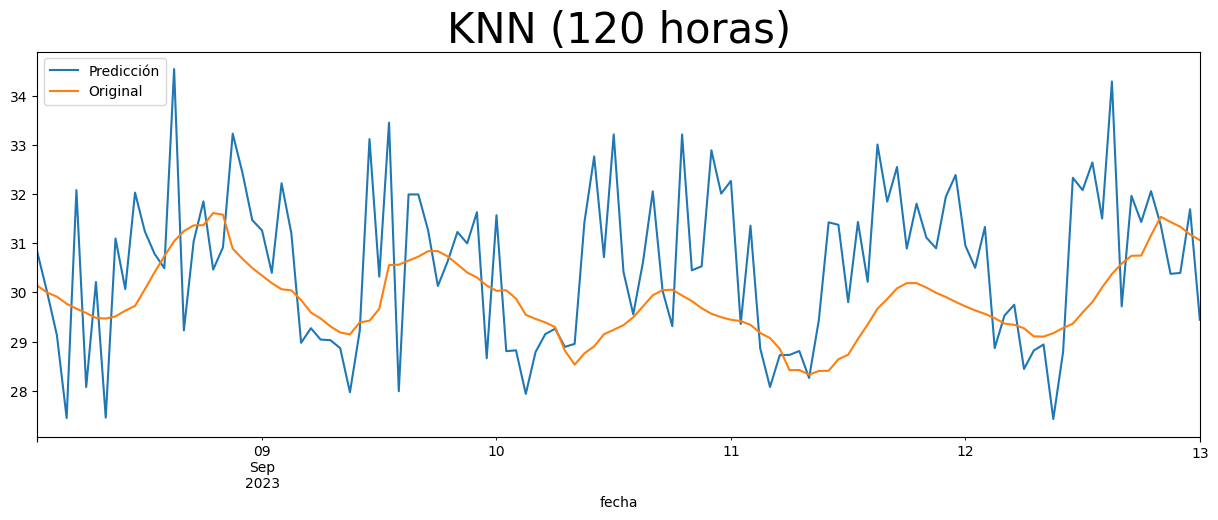

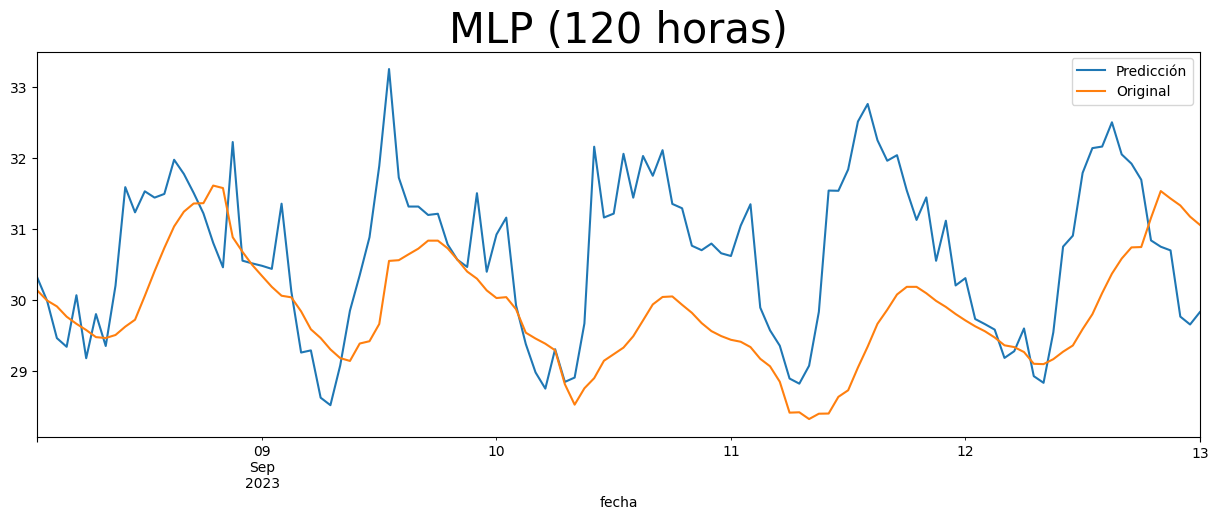

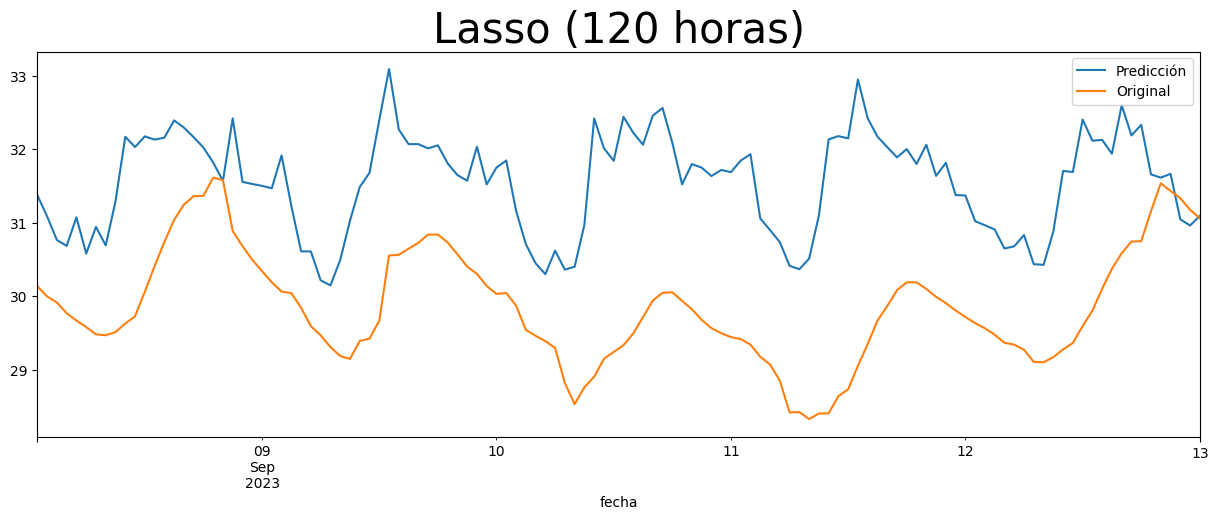

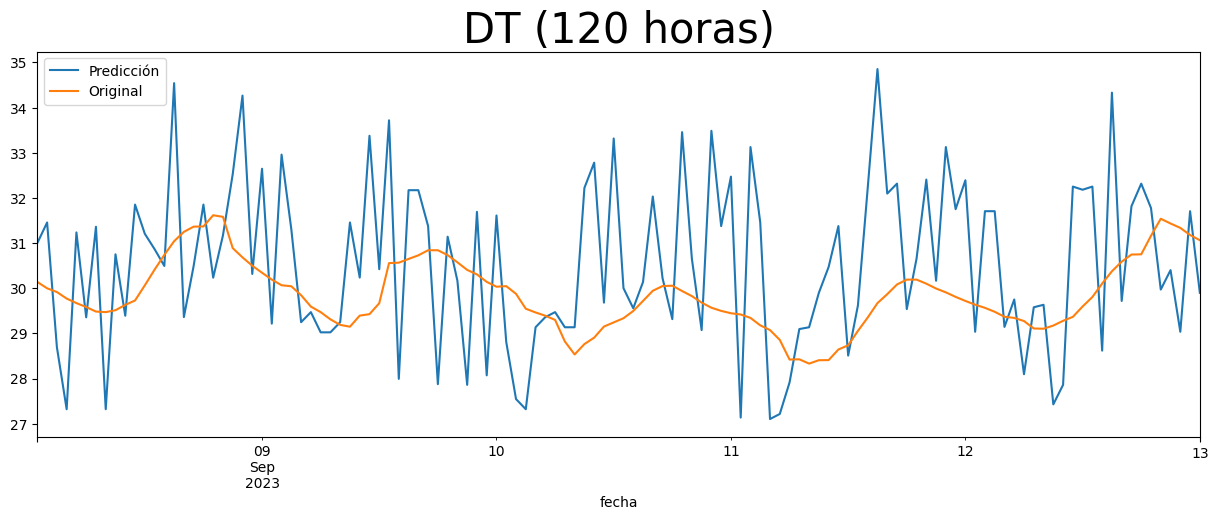

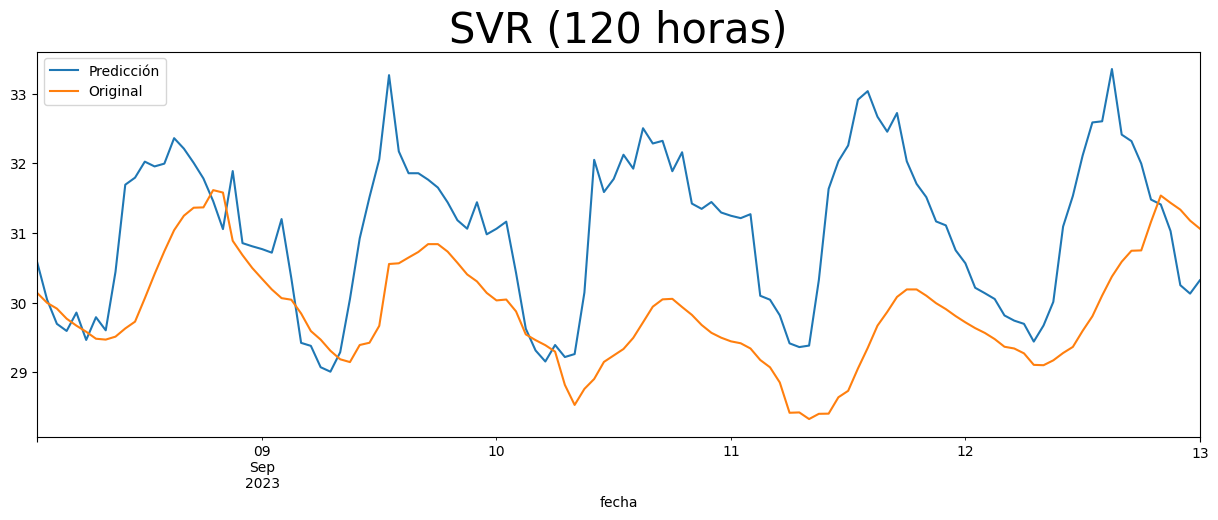

c:\Users\Vir\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 378.2773
Epoch 2/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.4744
Epoch 3/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5127
Epoch 4/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.1818
Epoch 5/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.2633
Epoch 6/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8103
Epoch 7/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8704
Epoch 8/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8965
Epoch 9/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5497
Epoch 10/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6340
Epoch 11/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6324
Epoch 12/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5179
Epoch 13/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3957
Epoch 14/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8322
Epoch 15/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1453
Ep

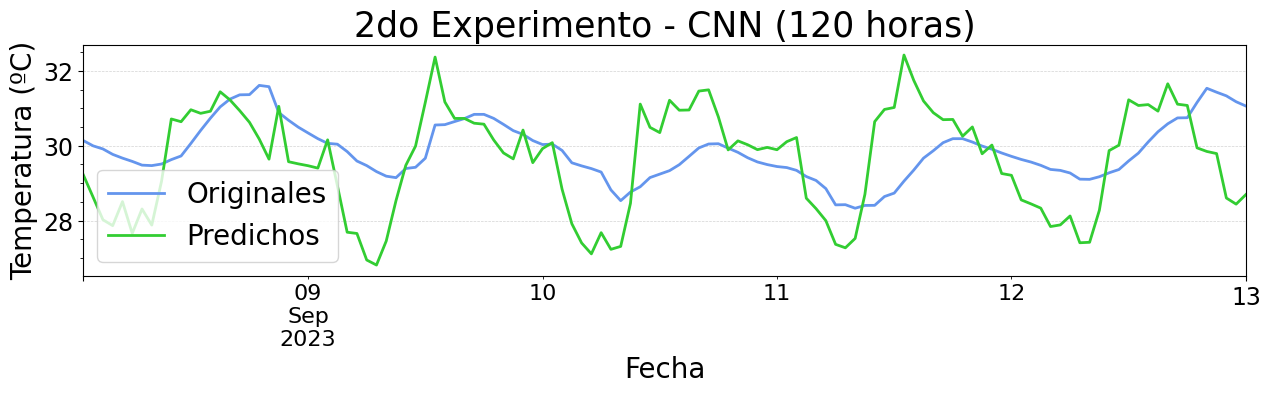

c:\Users\Vir\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


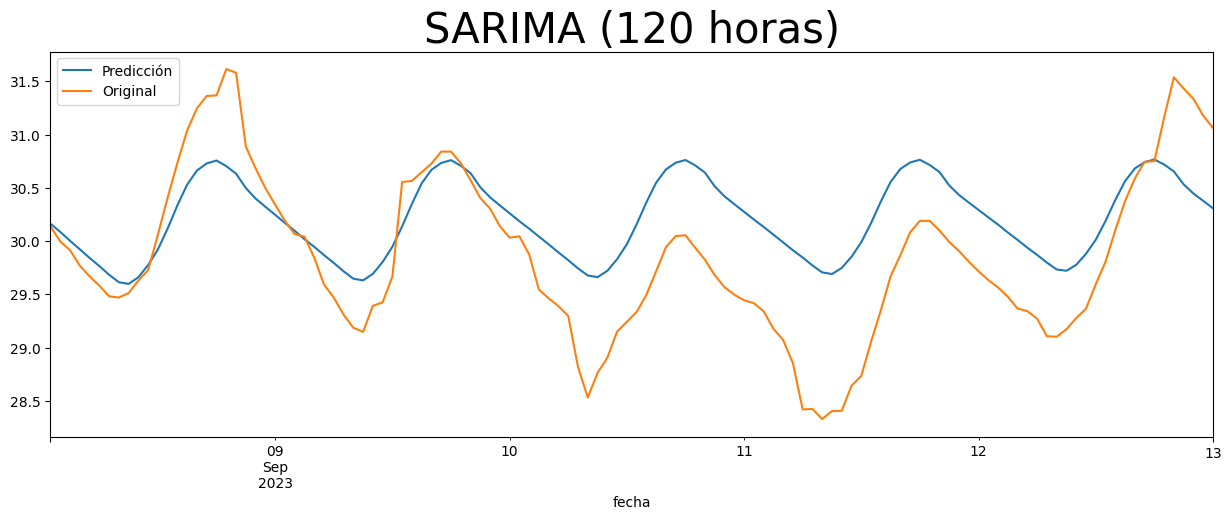

Fechas train : 2023-06-17 00:00:00 --- 2023-08-27 08:00:00  (n=1713)
Fechas test  : 2023-08-27 09:00:00 --- 2023-09-13 00:00:00  (n=400)


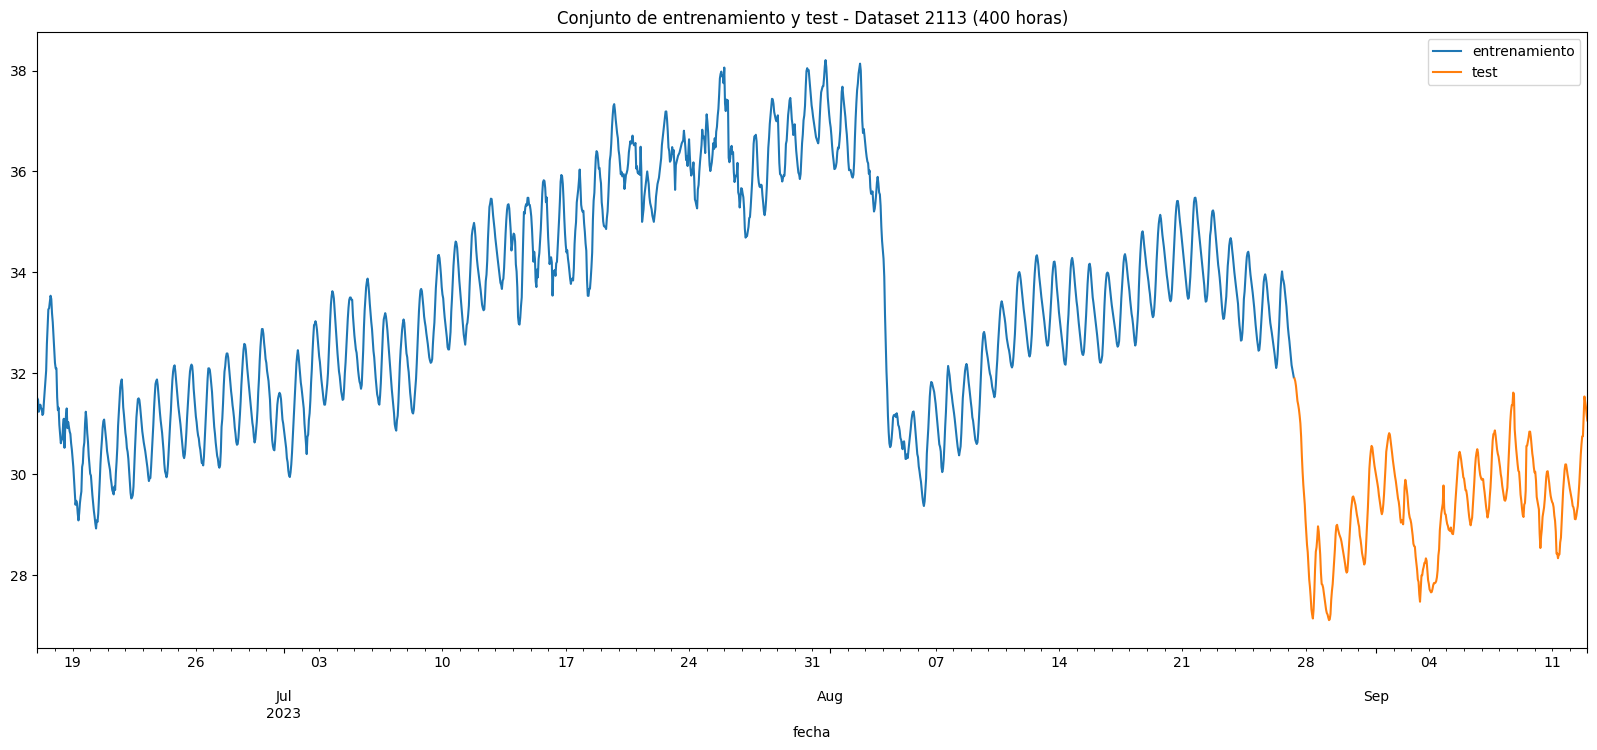

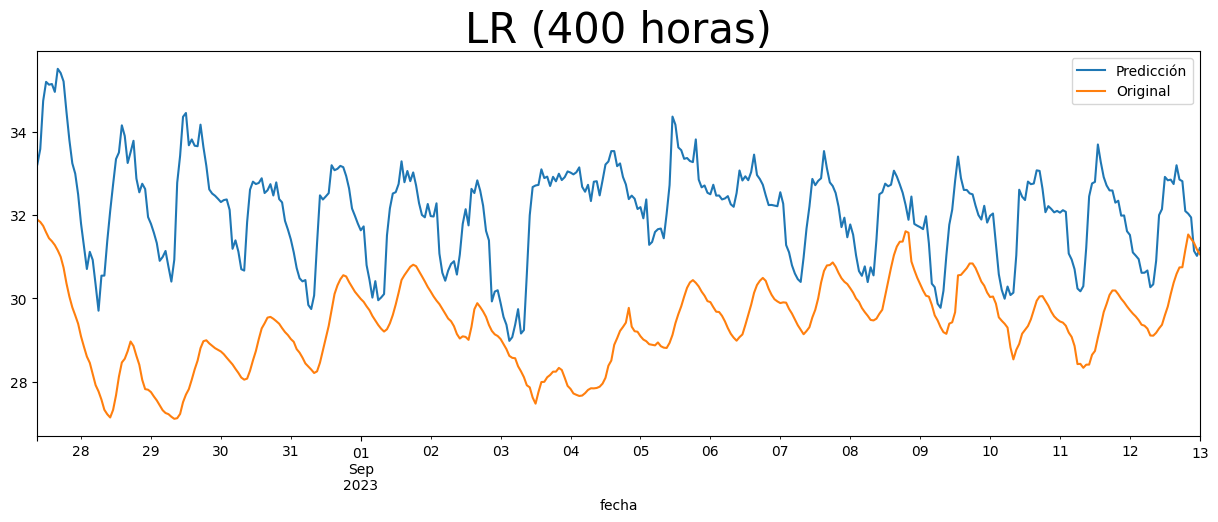

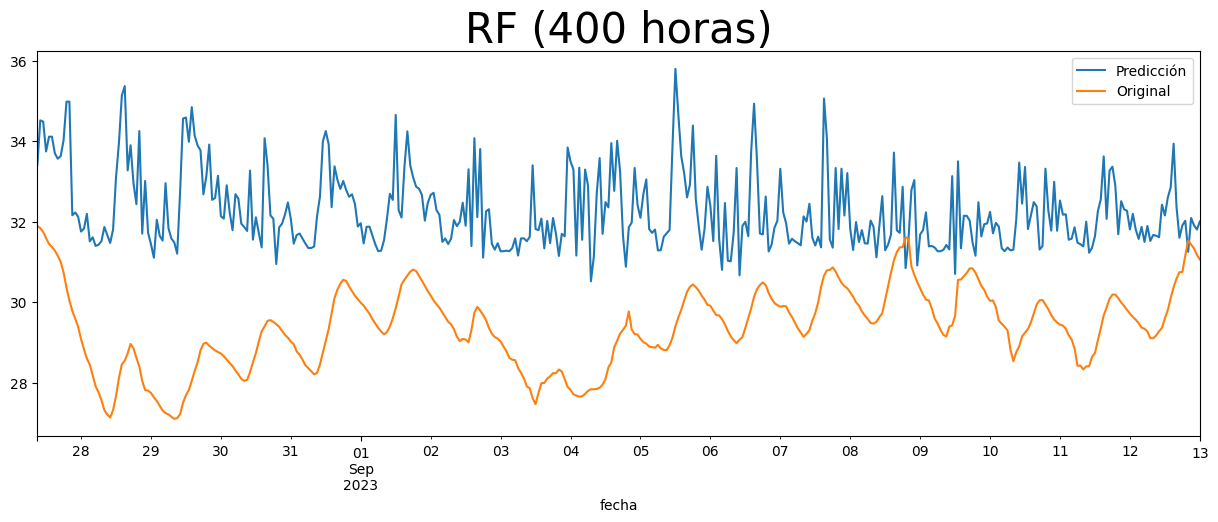

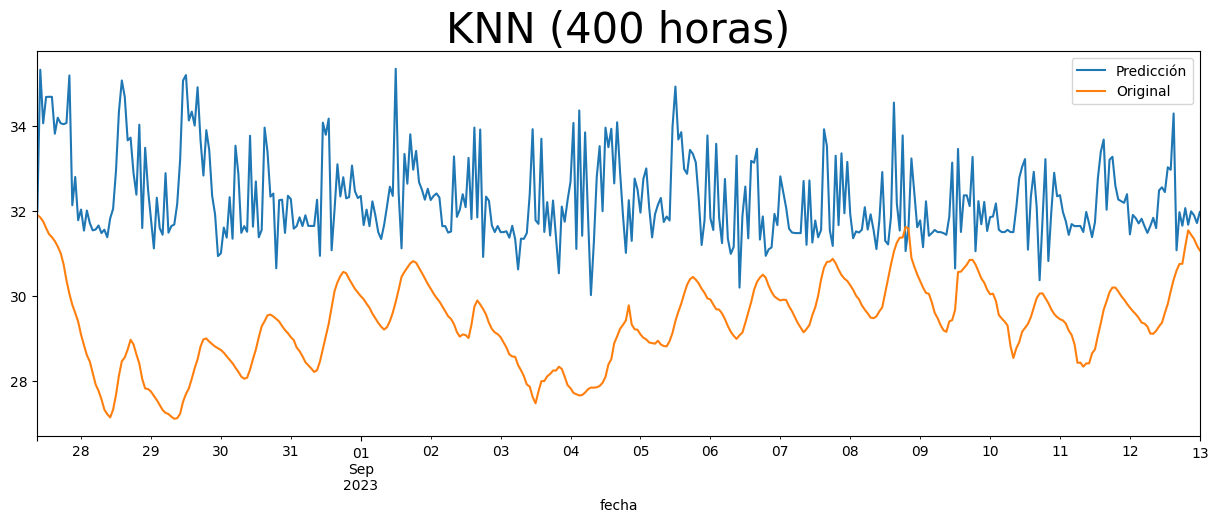

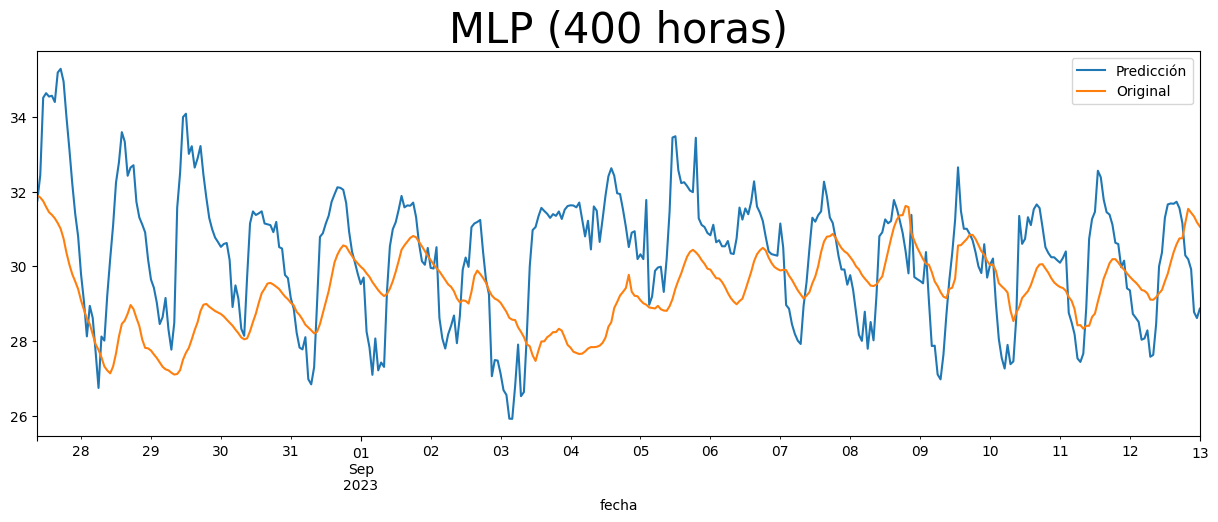

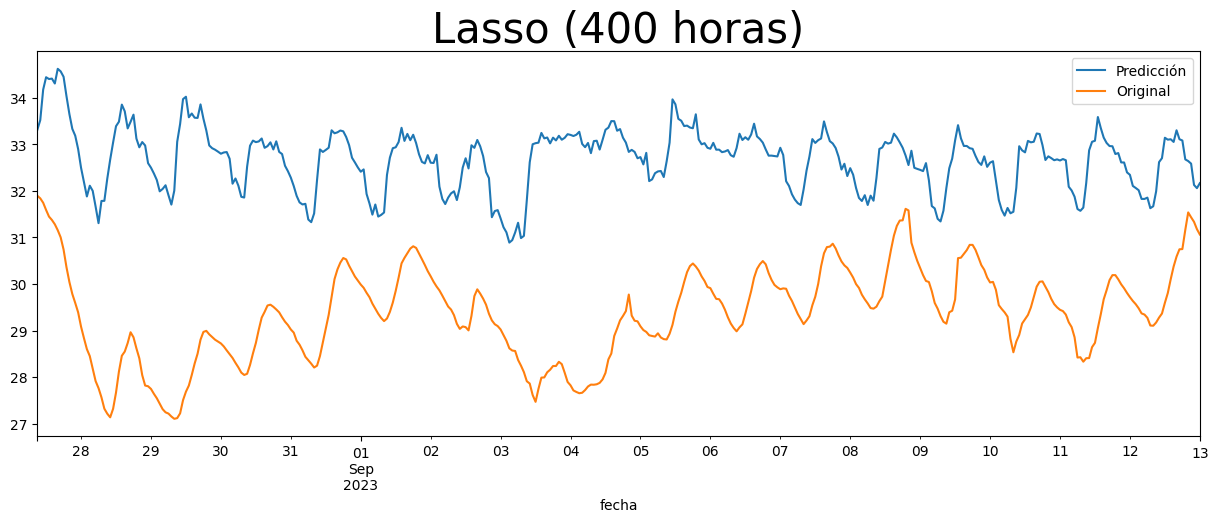

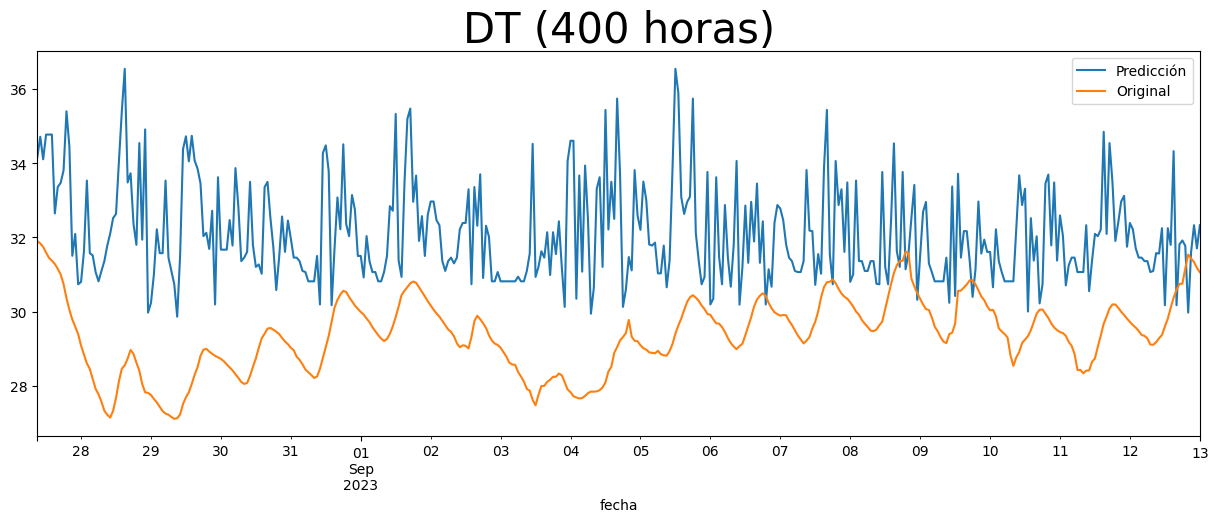

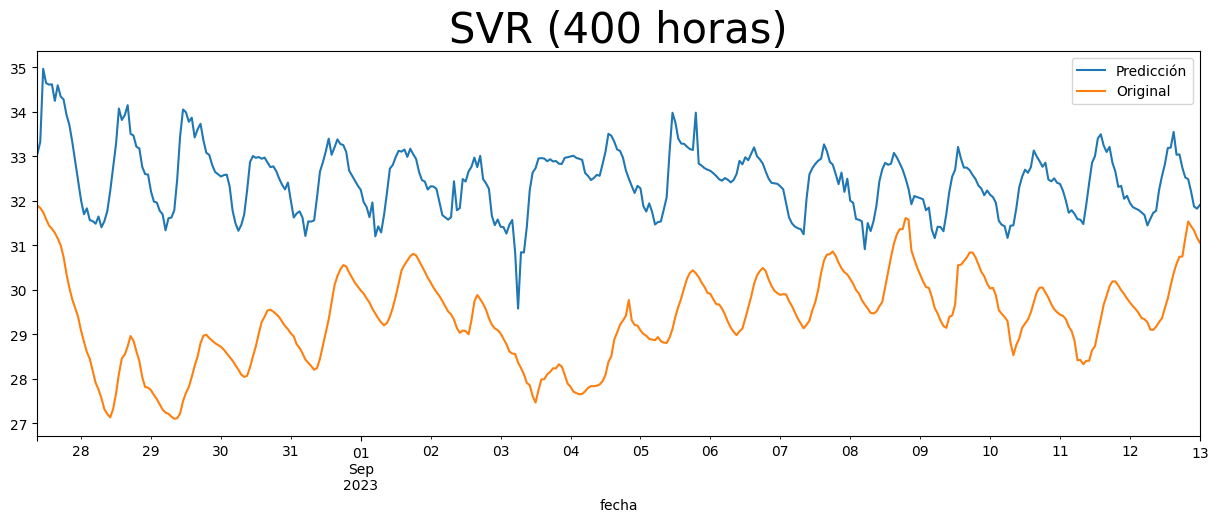

Epoch 1/100


c:\Users\Vir\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 681.6436
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.6821
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.6953
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0496
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3105
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3417
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4437
Epoch 8/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1985
Epoch 9/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.0909
Epoch 10/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.2516
Epoch 11/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.0049
Epoch 12/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1713
Epoch 13/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.3027
Epoch 14/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0367
Epoch 15/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1603
Epoch 16/100
7

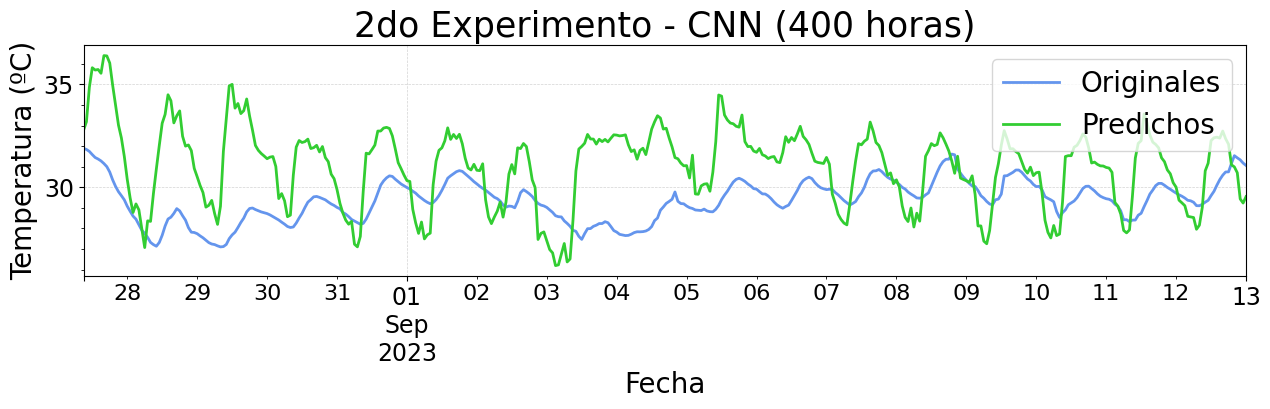

c:\Users\Vir\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


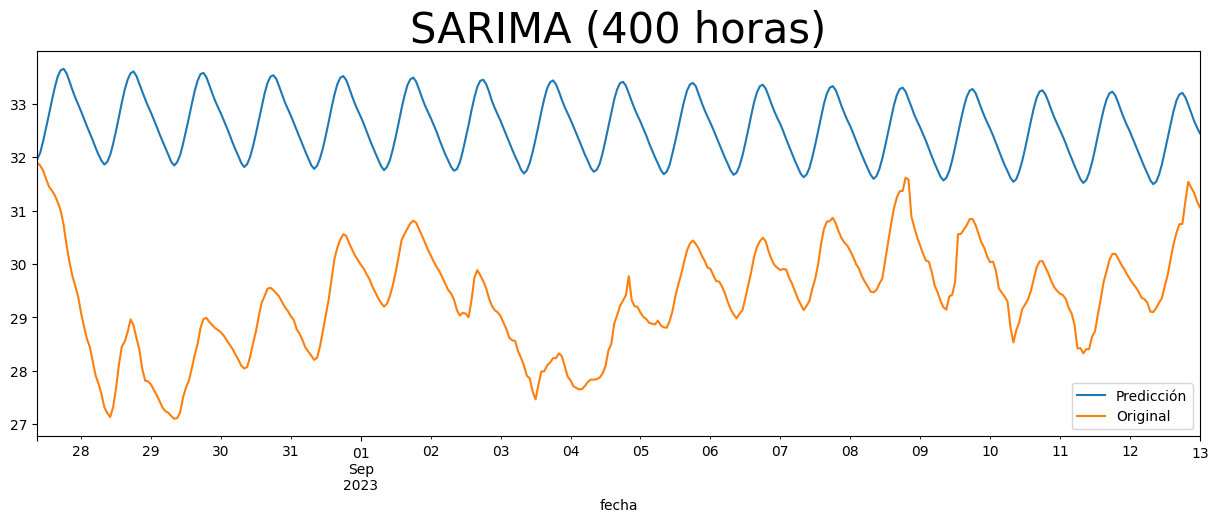

Fechas train : 2023-06-17 00:00:00 --- 2023-08-26 12:00:00  (n=1693)
Fechas test  : 2023-08-26 13:00:00 --- 2023-09-13 00:00:00  (n=420)


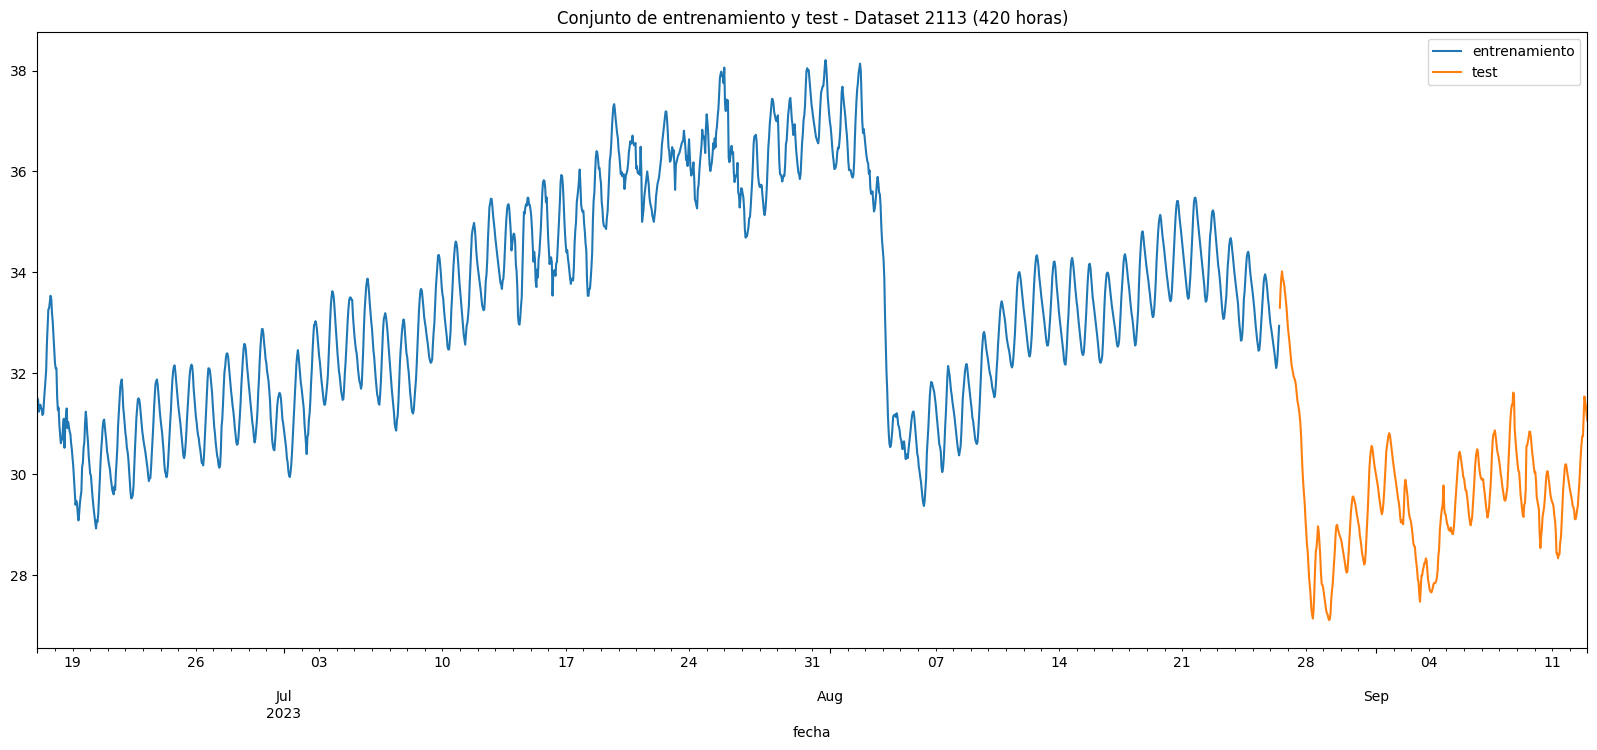

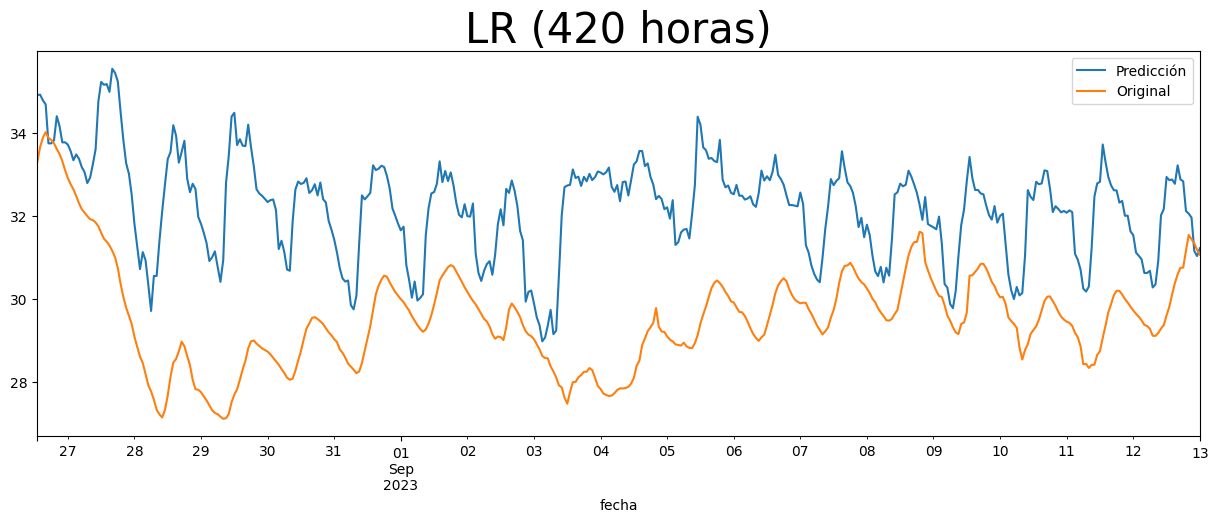

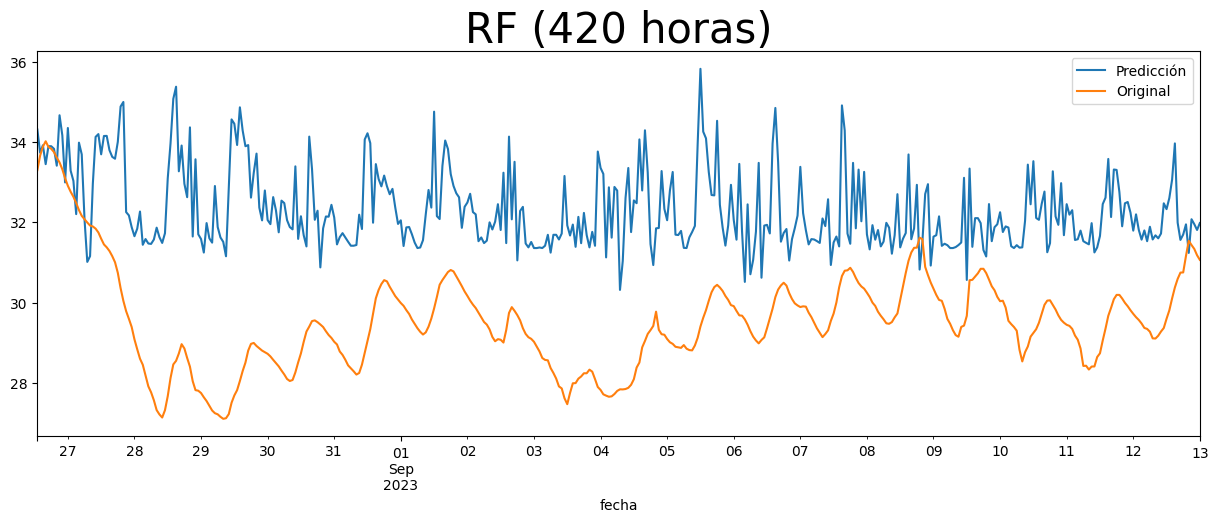

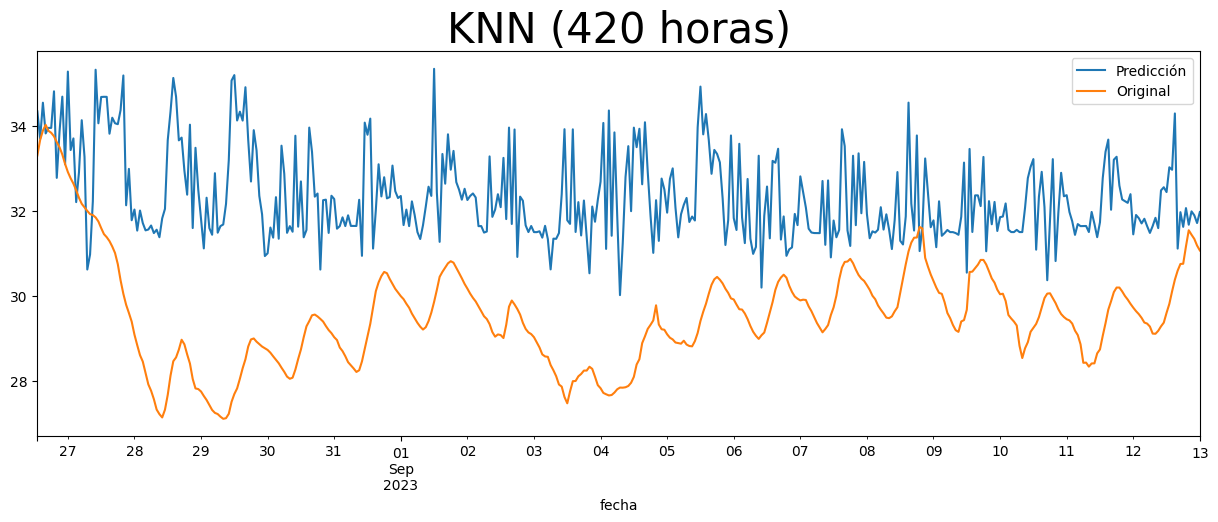

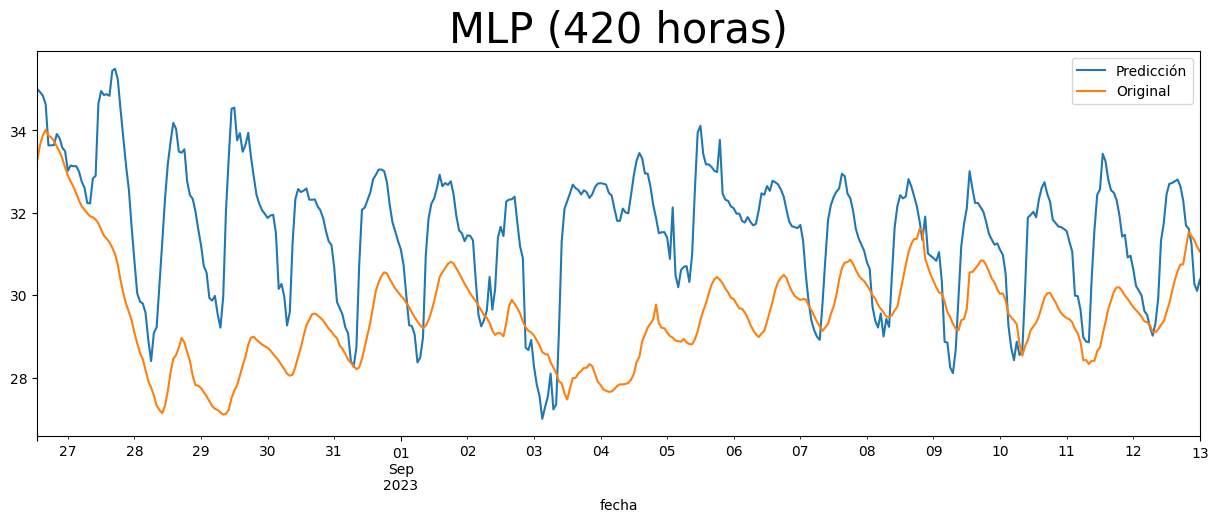

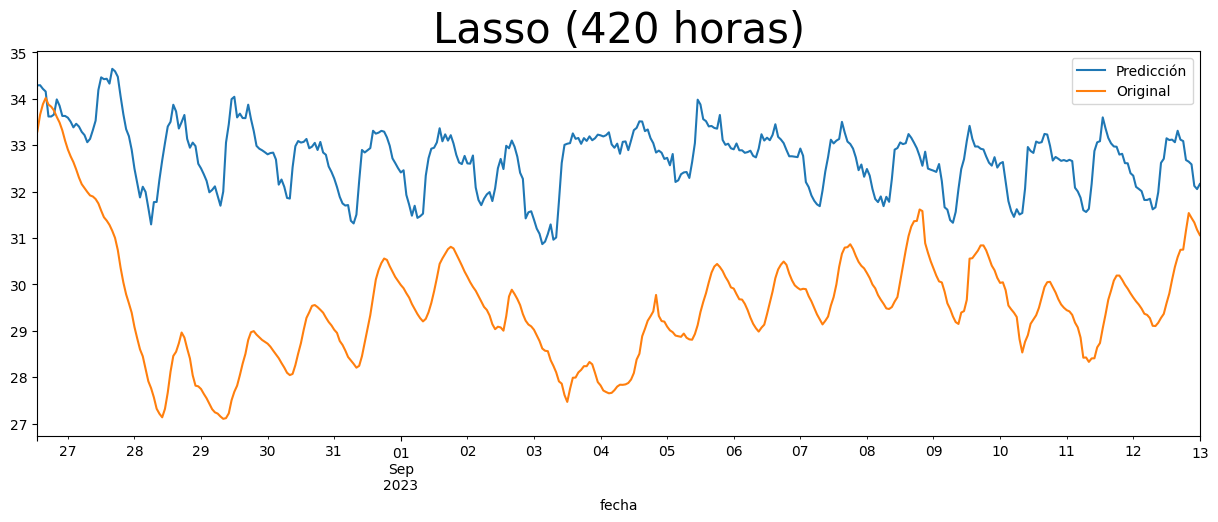

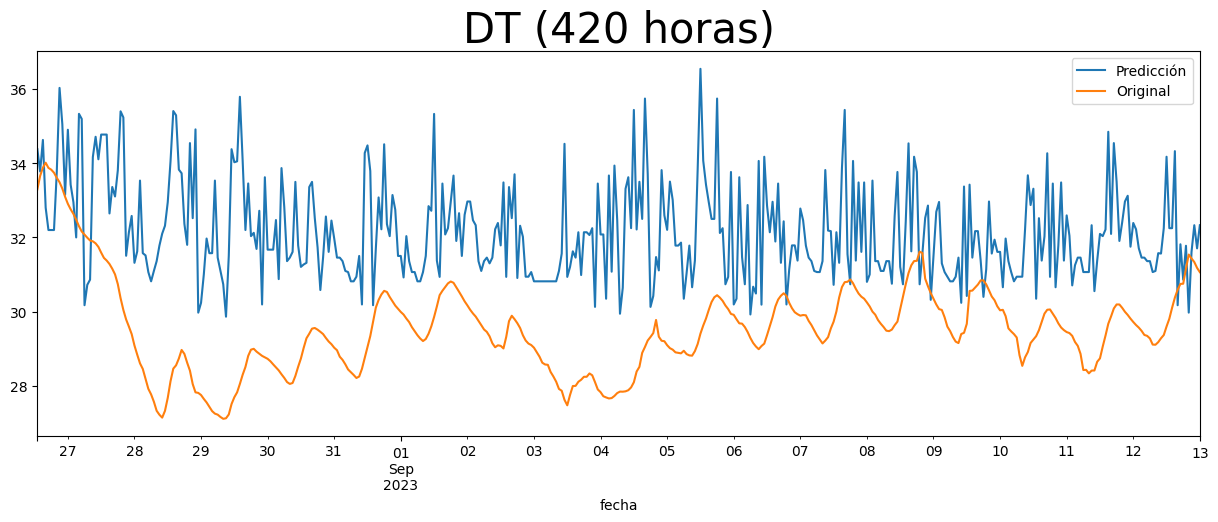

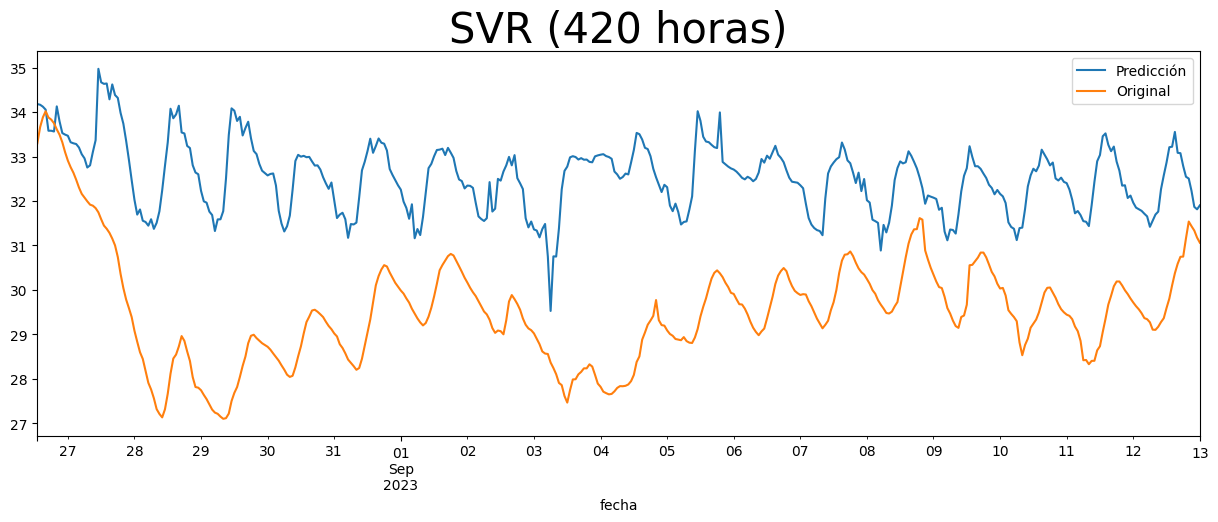

c:\Users\Vir\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1396.4535
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 260.9919
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.4614
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.7945
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.3254
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.0750
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.7089
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7424
Epoch 9/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.5066
Epoch 10/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.6032
Epoch 11/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.2139
Epoch 12/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.9916
Epoch 13/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8576
Epoch 14/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6769
Epoch 15/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1936

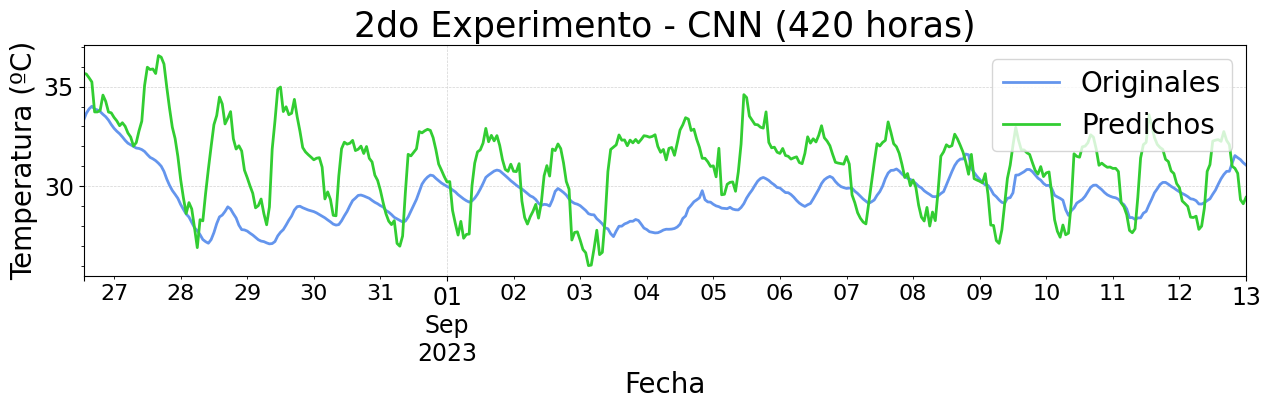

c:\Users\Vir\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


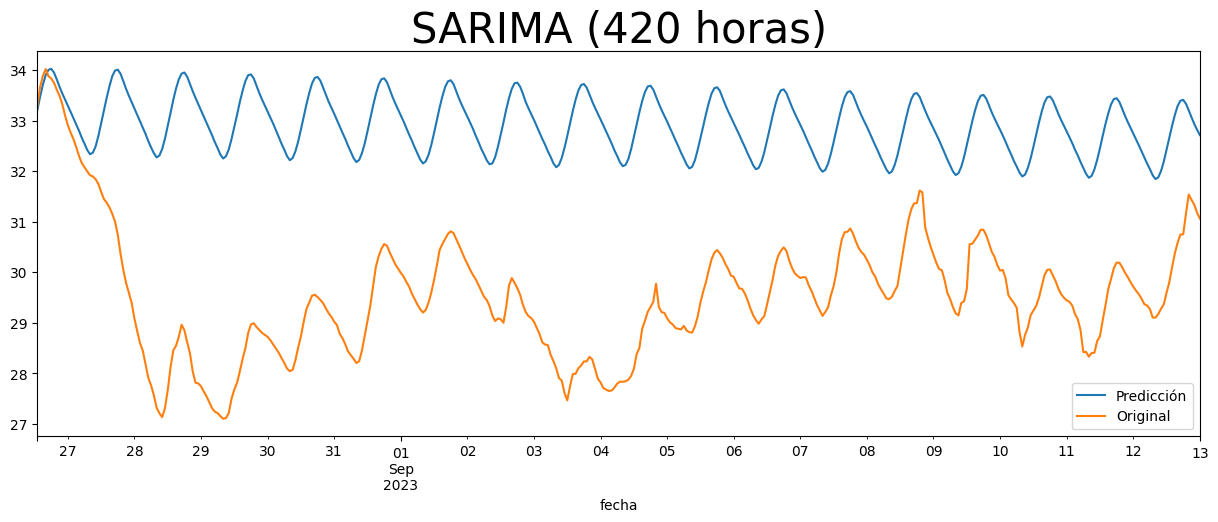

In [18]:
# DATASET 3
resultados = pd.DataFrame()

predicciones_todas = []

for hor in HORIZONTES_3:
    datos_train, datos_test = separar_train_test(datos, TERCER_CONJUNTO, hor)
    resultados, predicciones = ejecutar_modelos(datos_train, datos_test, hor, resultados)
    predicciones_todas.append(predicciones)

In [19]:
predicciones_todas

[[                     temperatura
  fecha                           
  2023-09-08 01:00:00    30.719082
  2023-09-08 02:00:00    30.239715
  2023-09-08 03:00:00    29.774276
  2023-09-08 04:00:00    29.650551
  2023-09-08 05:00:00    30.123218
  ...                          ...
  2023-09-12 20:00:00    31.154797
  2023-09-12 21:00:00    31.168989
  2023-09-12 22:00:00    30.242395
  2023-09-12 23:00:00    30.113046
  2023-09-13 00:00:00    30.315505
  
  [120 rows x 1 columns],
                       temperatura
  fecha                           
  2023-09-08 01:00:00    30.724175
  2023-09-08 02:00:00    29.958147
  2023-09-08 03:00:00    29.032100
  2023-09-08 04:00:00    28.230625
  2023-09-08 05:00:00    31.368025
  ...                          ...
  2023-09-12 20:00:00    30.206900
  2023-09-12 21:00:00    29.970650
  2023-09-12 22:00:00    29.959250
  2023-09-12 23:00:00    31.400637
  2023-09-13 00:00:00    29.449775
  
  [120 rows x 1 columns],
                       temperatu

In [20]:
resultados.reset_index(drop=True, inplace=True)
resultados

model  horizonte         r2        mse       mae
0       LR        120  -2.976318   2.301051  1.239682
1       RF        120  -3.545641   2.630513  1.266053
2      KNN        120  -3.648112   2.689811  1.290424
3      MLP        120  -2.105358   1.797037  1.031439
4    Lasso        120  -4.984919   3.463407  1.692204
5       DT        120  -5.356451   3.678409  1.546917
6      SVR        120  -3.359439   2.522759  1.279324
7      CNN        120  -1.910161   1.684078  1.075248
8   SARIMA        120   0.289316   0.411265  0.531263
9       LR        400  -8.206069   9.304667  2.741313
10      RF        400  -8.975737  10.082578  2.907581
11     KNN        400  -9.105205  10.213433  2.906010
12     MLP        400  -3.040181   4.083452  1.622030
13   Lasso        400 -10.948047  12.076012  3.309176
14      DT        400  -8.807476   9.912515  2.756716
15     SVR        400  -9.682509  10.796920  3.097597
16     CNN        400  -5.369475   6.437692  2.076319
17  SARIMA        400  -9.913078  11.029958  3.186925
18      LR        420  -4.593533   8.957396  2.656834
19      RF        420  -4.995039   9.600360  2.790678
20     KNN        420  -5.139858   9.832272  2.812208
21     MLP        420  -3.226169   6.767720  2.150946
22   Lasso        420  -6.212441  11.549889  3.184978
23      DT        420  -4.867816   9.396629  2.682565
24     SVR        420  -5.486356  10.387148  2.986260
25     CNN        420  -2.826667   6.127963  2.002340
26  SARIMA        420  -6.910252  12.667353  3.366554

In [21]:
resultados.to_excel('resultados.xlsx', sheet_name='Experimentos_2',index=False)


In [22]:
df = pd.DataFrame(resultados)
df = df.round(2)
latex_code = df.to_latex(index=False, float_format="%.2f")

In [23]:
print(latex_code)

\begin{tabular}{lrrrr}
\toprule
model & horizonte & r2 & mse & mae \\
\midrule
LR & 120 & -2.98 & 2.30 & 1.24 \\
RF & 120 & -3.55 & 2.63 & 1.27 \\
KNN & 120 & -3.65 & 2.69 & 1.29 \\
MLP & 120 & -2.11 & 1.80 & 1.03 \\
Lasso & 120 & -4.98 & 3.46 & 1.69 \\
DT & 120 & -5.36 & 3.68 & 1.55 \\
SVR & 120 & -3.36 & 2.52 & 1.28 \\
CNN & 120 & -1.91 & 1.68 & 1.08 \\
SARIMA & 120 & 0.29 & 0.41 & 0.53 \\
LR & 400 & -8.21 & 9.30 & 2.74 \\
RF & 400 & -8.98 & 10.08 & 2.91 \\
KNN & 400 & -9.11 & 10.21 & 2.91 \\
MLP & 400 & -3.04 & 4.08 & 1.62 \\
Lasso & 400 & -10.95 & 12.08 & 3.31 \\
DT & 400 & -8.81 & 9.91 & 2.76 \\
SVR & 400 & -9.68 & 10.80 & 3.10 \\
CNN & 400 & -5.37 & 6.44 & 2.08 \\
SARIMA & 400 & -9.91 & 11.03 & 3.19 \\
LR & 420 & -4.59 & 8.96 & 2.66 \\
RF & 420 & -5.00 & 9.60 & 2.79 \\
KNN & 420 & -5.14 & 9.83 & 2.81 \\
MLP & 420 & -3.23 & 6.77 & 2.15 \\
Lasso & 420 & -6.21 & 11.55 & 3.18 \\
DT & 420 & -4.87 & 9.40 & 2.68 \\
SVR & 420 & -5.49 & 10.39 & 2.99 \\
CNN & 420 & -2.83 & 6.13 & 2.00 \\
S

In [8]:
datos_train, datos_test = separar_train_test(datos, TERCER_CONJUNTO, HOR_33)

X_train_CNN = datos_train[["ambiente","nivel"]].to_numpy()
y_train_CNN = datos_train["temperatura"].to_numpy()
X_test_CNN = datos_test[["ambiente","nivel"]].to_numpy()
y_test_CNN = datos_test["temperatura"].to_numpy()

X_train_CNN = X_train_CNN.reshape(X_train_CNN.shape[0], X_train_CNN.shape[1], 1)
X_test_CNN = X_test_CNN.reshape(X_test_CNN.shape[0], X_test_CNN.shape[1], 1)

##########################################################################################################


res, predicciones_CNN = CNN_V(X_train_CNN, y_train_CNN, X_test_CNN, y_test_CNN, HOR_33, datos_test)






NameError: name 'separar_train_test' is not defined

In [ ]:
plt.figure(figsize=(15,7))
l1 = plt.plot(dfwork["temp_agua_CNN"].iloc[:365], color='cornflowerblue', label="Tª agua CNN")
plt.setp(l1, markersize=8)

l3 = plt.plot(dfwork["temp_agua_LR"].iloc[:365], color='seagreen', label="Tª agua LR")
# plt.setp(l3, markersize=8)

# l3 = plt.plot(dfwork["temp_agua_DT"].iloc[:365], color='red', label="Tª agua DT")
# plt.setp(l3, markersize=8)

l4 = plt.plot(dfwork["temp_agua_KN"].iloc[:365], color='gold', label="Tª agua KNN")
plt.setp(l4, markersize=8)

# l5 = plt.plot(dfwork["temp_agua_RF"].iloc[:365], color='indigo', label="Tª agua RF")
# plt.setp(l5, markersize=8)


q = plt.plot(dfwork["ambiente"].iloc[:365] , color='darkgray', label="Tª ambiente")

# Configuración de los ejes y títulos
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Temperatura (ºC)', fontsize=14)
plt.title(f'Reconstrucción histórica 1947', fontsize=16)

# Quitar los bordes superior y derecho
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Ajustar el tamaño de la leyenda
plt.legend(fontsize=12)

# Ajustar el tamaño de las etiquetas de los ejes
ax.tick_params(axis='both', which='major', labelsize=12)

# Configurar la cuadrícula
ax.grid(True, which='both', linestyle='--', linewidth=0.7, color='grey', alpha = 0.5)

# Guardar el gráfico en una carpeta con buena resolución
plt.savefig(f"exp2.png", dpi=300, bbox_inches='tight')
plt.show()